In [1]:
# import all stuff we will need
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

from scipy.optimize import fsolve
from gbm_d import gbm_d
from barrier_bs import barrier_bs
from yf import yf

# 5.1 Payoff and profit

The payoff of standard bonus certificate written on one underlying is

\begin{equation*}
g(S_T)=S_T+I\max\{X-S_T,0\}
\end{equation*}

with 

\begin{equation*}
I:=1_{\{T<\tau_G\}}:=\left\{\begin{array}{ll}1 & {\rm if}\;\;T< \tau_G \\ 0 & {\rm else}\end{array}\right.
\end{equation*}

and $G=]B,\infty[$. Usually, the issue price of the product is $V_{\rm bc}(s,0)=S_0=s$, hence the profit $P(S_T)$ is

\begin{equation*}
P(S_T)=S_T-S_0+I\max\{X-S_T,0\}
\end{equation*}

# 5.2 Replication and pricing

We replicate the above payoff $g$. The term $S_T$ corresponds to the price of the underlying; we may generate this cash flow by looking at a so-called <span style="color:red">zero strike call</span> with payoff

\begin{equation*}
V_{c,{\rm zs}}(s,T)=\max\{S_T-X,0\}=\max\{S_T-0,0\} = S_T\;.
\end{equation*}

By the considerations made in chapter 4, the term $I\max\{X-S_T,0\}$ corresponds to the payoff of a down-and-out put option with strike $X$ (and barrier $B$). Thus, at maturity, we may decompose a bonus certificate in a sum of a zero strike call and a down-and-out put. However, the price of the replication has to be equal to the price $V_{\rm bc}$ of the certificate not only at maturity $t=T$, but for every instant of time $0\leq t\leq T$, i.e., there holds  

\begin{equation*}
V_{\rm bc}(s,t)=V_{c,{\rm zs}}(s,t)+V_{p,{\rm do}}(s,t)\;.
\end{equation*}

If this equation would be wrong there would exist arbitrage opportunities. To find the value $V_{\rm bc}$, we use the Black-Scholes model with continuous dividend yields. The value $V_{c,{\rm zs}}$ of the zero strike call follows by the Black-Scholes formula together with a limit argument. If we let tend the strike $X$ to $0$, the auxiliary variables $d_1$ and $d_2$ in the formula of Black and Scholes tend to $\infty$. As consequence, the values $N(d_1)$ and $N(d_2)$ tend to $1$, whence we find

\begin{equation*}
V_{c,{\rm zs}}(s,t)=\lim_{X\rightarrow 0}\big(se^{-q(T-t)}N(d_1)-Xe^{-r(T-t)}N(d_2)\big)=se^{-q(T-t)}\;.
\end{equation*}

Thus, the price of a bonus certificate written on a single underlying is given by 

\begin{equation*}
V_{\rm bc}(s,t)=se^{-q(T-t)}+V_{p,{\rm do}}(s,t)\;.
\end{equation*}


### Example 5.1

We calculate the issue price of the product in the figure below (compare with example 3.2). The underlying has the values: $s=S_0=80.80$ CHF, $\sigma=14.74\%$ and $q=3.30\%$. The parameters of the option are: strike $X=84.84$ CHF, barrier $B=55.752$, time-to-maturity September 26, 2018 to September 27, 2021. The continuously compounded risk free is $r=-0.00329$. 

<img src="BC_JB_1.jpg" alt="Drawing" style="width: 600px;"/>
<img src="BC_JB_2.jpg" alt="Drawing" style="width: 600px;"/>

In [2]:
s = 80.80; q = 0.033; T = yf((26,9,2018),[(27,9,2021)]); 
Vbc = s*np.exp(-q*T)+barrier_bs(s,55.752,84.84,T[0],0.1474,-0.00329,q)[0]
Vbc[0]

79.63279969440778

## 5.3 Bonus certificates on several underlyings

An obvious generalisation of the payoff of a bonus certificate written on one underlying

\begin{equation*}
g(S_T)=S_T+I\max\{X-S_T,0\}
\end{equation*}

to the payoff of a bonus certificate written on $d>1$ underlyings is

\begin{equation*}
g({\bf S}_T)=B_T+I\max\{X-B_T,0\}, \quad B_t =\sum_{i=1}^d\omega_iS_t^i, \quad \omega_i:=\frac{B_0}{dS^i_0}\;.
\end{equation*}

Here, $I$ is defined as above, with 

\begin{equation*}
G=]B_1,\infty[\times \cdots \times ]B_d,\infty[\;.
\end{equation*}


Thus, $I=0$ indicates that at <span style="color:red"> least one</span> underlying hits its barrier before $T$. The price of a "standard" basket basket bonus certificate is

\begin{equation*}
V_{{\rm bc},d}({\bf s},t)=\sum_{i=1}^d\omega_is_ie^{-q_i(T-t)}+V_{p,{\rm do},d}({\bf s},t)
\end{equation*}


where we denote by $V_{p,{\rm do},d}({\bf s},t)$ the value of a down-and-out put on $d$ underlyings. By the general principles of derivatives pricing discussed in chapter 3 the price of a down-and-out put option is - under the assumption of time-continuous barrier monitoring - given by the expectation

\begin{equation}\label{eq:Vpdod_expectation}
V_{p,{\rm do},d}({\bf s},t)=e^{-r(T-t)}\mathbb{E}^{\mathbb{Q}}\big[g({\bf S}_T)1_{\{T<\tau_G\}}\mid {\bf S}_t={\bf s}\big]
\end{equation} 


with payoff function

\begin{equation*}
g({\bf s})=\max\big\{X-\sum_{i=1}^d\omega_is_i,0\big\}\;.
\end{equation*}

To find the above expectation, we need a model for the time evolution of the underlying $S_t^i$. Even for the simple Black-Scholes model the expectation above to calculate $V_{p,{\rm do},d}({\bf s},t)$ seems not to have an analytical expression (except the case $d=1$) such that we have to rely on approximative methods, for example Monte Carlo simulation or solving partial differential equations numerically. We use the Python function <span style="color:orange">gmb_d.py</span> to simulate paths of a two-dimensional geometric Brownian motion.

In [3]:
# input parameters
s0 = [143.4,51.35]; q = [0.045,0.046]; r = np.log(1.0087)
sigma = np.diag([0.181,0.17]); rho = np.array([[1,0.416],[0,1]]); 
rho = rho+rho.T-np.eye(2); Sigma = sigma.dot(rho).dot(sigma)
B = [107.55,38.5125]; X = 1140; T = yf((3,5,2011),[(3,5,2013)])
mu = [r-x for x in q]
q = np.reshape(np.asarray(q),[2,1]); B = np.reshape(np.asarray(B),[2,1])

In [4]:
# generate two paths
S1, t = gbm_d(s0=s0,Sigma=Sigma,mu=mu,T=T,Tau=[],dt=T/(4*252))
S2, t = gbm_d(s0=s0,Sigma=Sigma,mu=mu,T=T,Tau=[],dt=T/(4*252))

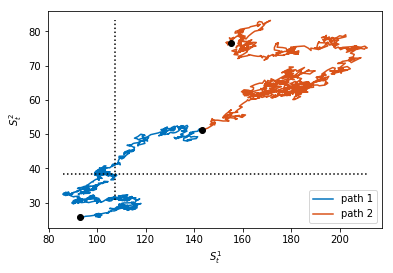

In [5]:
S1max = np.amax(S1,axis=0); S2max = np.amax(S2,axis=0);
plt.plot(S1[:,0],S1[:,1],color=(0,0.4470,0.7410)); 
plt.plot(S2[:,0],S2[:,1],color=(0.8500,0.3250,0.0980));
plt.plot(s0[0],s0[1],'ko'); # start point
plt.plot(S1[-1,0],S1[-1,1],'ko'); plt.plot(S2[-1,0],S2[-1,1],'ko'); # endpoints
plt.plot(np.array([B[0],B[0]]),np.array([0.8*B[1],np.maximum(S1max[1],S2max[1])]),'k:')
plt.plot(np.array([0.8*B[0],np.maximum(S1max[0],S2max[0])]),np.array([B[1],B[1]]),'k:')
plt.xlabel('$S_t^1$'); plt.ylabel('$S_t^2$'); plt.legend(('path 1','path 2'));

In [ ]:
### Example 5.2

We calculate the issue price of the basket bonus certificate in the figure below. 

<img src="MBC_LEU.jpg" alt="Drawing" style="width: 600px;"/>

The underlyings have the values: $s_1=S_0^1=143.4$, $s_2=S^2_0=51.35$, $\sigma_1=18.1\%$, $\sigma_2=17.0\%$, $\rho=0.416$, discrete dividends $D_1=6.60$ and $D_2=2.34$, resulting in the continuous dividend yields $q_1=\ln(1+D_1/S^1_0)=4.50\%$ and $q_2=\ln(1+D_2/S^2_0)=4.46\%$, respectively. The continuously compounded risk free is $r=\ln(1+0.0087)$. The parameters of the product are: bonus level $X=1140$, barriers $B_1=107.55$ and $B_2=38.5125$, time-to-maturity May 3, 2011 to May 3, 2013.

In [6]:
# input parameters (Monte Carlo simulation)
n = 10**4; dt = 1/(8*252); v = np.zeros(n)

In [7]:
omega = 1000/(2*np.reshape(np.asarray(s0),[2,1]))
# Monte Carlo simulation
for j in range(0,n):
    D = gbm_d(s0,mu,Sigma,[],T,dt) 
    S = D[0][1:] # simulated stock prices, excluding s0
    # the minimium stock prices
    Smin = np.amin(S,axis=0); Smin = Smin.reshape(2,1)
    ST = S[-1,:]; ST = ST.reshape(2,1)
    BT = np.sum(omega*ST) # final basket value
    
    if np.any(Smin-B<=0): # barrier hit?
        v[j] = BT 
    else:
        v[j] = BT+np.maximum(X-BT,0) 
    
V = np.exp(-r*T)*np.mean(v)

In [8]:
V[0]

961.3544926992049

Draw a histogram of the realisations $\{v_1,v_2,\ldots,v_n\}$ of the random variable

$$V_T:=B_T+\max\{X-B_T,0\}1_{\{T<\tau_G\}},\;\;B_T=\sum_{i=1}^d\omega_i S_T^i$$

(the cash flow of the product at maturity). This histogram is an approximation to the risk-neutral density of $V_T$. Note that 


$$e^{-rT}\overline{v}=e^{-rT}\frac{1}{n}\sum_{j=1}^nv_j=V\approx V_{{\rm bc},2}({\bf s},0)=\mathbb{E}^{\mathbb{Q}}[e^{-rT}V_T]$$

is an approximation of price of the product.

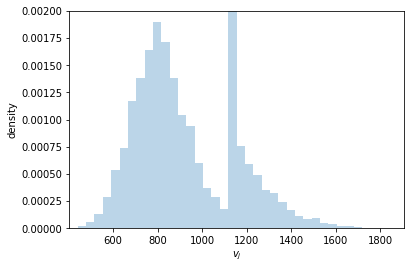

In [9]:
plt.hist(v,bins=40,density='True',alpha=0.3);
plt.xlabel('$v_j$'); plt.ylabel('density')
plt.axis([0.999*np.min(v),1.001*np.max(v),0,0.002]);

Note that since $\Delta t\neq 0$, the estimator $e^{-rT}\overline{V}:=e^{-rT}\frac{1}{n}\sum_{j=1}^nV_T^j$ (the $v_j$ are realisations of $V_T^j$) is biased, i.e., 

$$\mathbb{E}[e^{-rT}\overline{V}]\neq \mu:=V_{{\rm bc},d}({\bf s},0)$$ 

Thus, even if we would take infinitely many paths ($n\rightarrow\infty$) in the above Monte Carlo simulation, the value $V$ would not be equal to the theoretical price of the product.

According to the central limit theorem (CLT), $e^{-rT}\overline{V}$ is (approx.) normal. This we can test by running the above Monte Carlo simulation $N$ times yielding the averages $\{e^{-rT}\overline{v}_1,e^{-rT}\overline{v}_2,\ldots,e^{-rT}\overline{v}_N\}$ and plot a histogram of these values.

In [10]:
# demonstration of the CLT (this may take several minutes!)
n = 10**2; N = 3*10**2
vbar = np.zeros(N)
for i in range(0,N):
    v1 = np.zeros(n)
    for j in range(0,n):
        D = gbm_d(s0,mu,Sigma,[],T,dt) 
        S = D[0][1:] # simulated stock prices, excluding s0
        # the minimium stock price
        Smin = np.amin(S,axis=0); Smin = Smin.reshape(2,1)
        ST = S[-1,:]; ST = ST.reshape(2,1)
        BT = np.sum(omega*ST) # final basket value
        
        if np.any(Smin-B<=0): # barrier hit?
            v1[j] = BT
        else:
            v1[j] = BT+np.maximum(X-BT,0) 
    
    vbar[i] = np.exp(-r*T)*np.mean(v1)

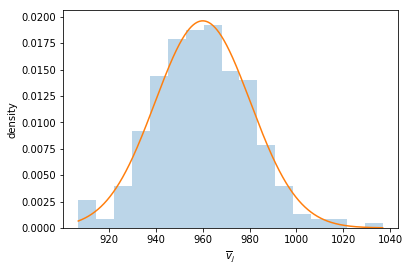

In [11]:
plt.hist(vbar,'auto',density='True',alpha=0.3);
x = np.arange(np.min(vbar),np.max(vbar),0.01);
plt.plot(x,ss.norm.pdf(x,np.mean(vbar),np.std(vbar)));
plt.xlabel('$\overline{v}_j$'); plt.ylabel('density');